# ENCODING

In [100]:
import pretty_midi
import librosa.display as display
import matplotlib.pyplot as plt
from IPython.display import Audio
from tqdm import tqdm


In [101]:
from MidiFile.midi_file import MidiFileParser
import pandas as pd

path = "C:/Users/Stanislasd’Orsetti/Desktop/data_for_test/Mozart/TEST/"
output_path ="C:/Users/Stanislasd’Orsetti/DL_SBGMproject/test/data_csv_file/encoded_Mozartsmall.csv" 
maxsize = 200000


In [102]:
mfp = MidiFileParser(path, maxsize, logging=True)

In [103]:
mfp.get_piano_roll_df(output_path)

C:\Users\Stanislasd’Orsetti\AppData\Local\Programs\Python\Python39\lib\site-packages\pretty_midi\pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
C:\Users\Stanislasd’Orsetti\AppData\Local\Programs\Python\Python39\lib\site-packages\pretty_midi\pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


## check difference

In [353]:
fs = 32
df = encoding(filename, fs)
# df = chopster(df)
# df = trim_blanks(df)
# df = minister(df)
# df = arpster(df)
# # df = cutster(df)
# df = padster(df)

piano_rolls2 = df.reset_index()
piano_rolls2["filename"] = piano_rolls2["piano_roll_name"].apply(lambda x : x.split(":")[0])
sample = piano_rolls2.groupby(['filename', "timestep"])[column_names].sum().values


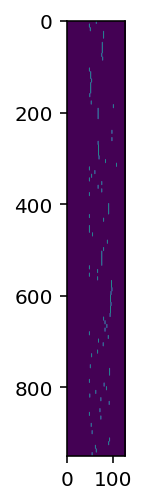

In [354]:
plt.imshow(sample[50:1000,:])

# VAE

In [1]:
import torch

In [1]:
from VAE.VAE import VariationalAutoencoder
from torch.utils.data import DataLoader, random_split
from VAE.torch_data import *

In [6]:
from MidiFile.midi_file import MidiFileParser

ModuleNotFoundError: No module named 'DL_SBGMproject'

In [ ]:
transform = BarTransform(bars=totalbars, note_count=NUM_PITCHES)#configures number of input bars
midi_dataset = MidiDataset(csv_file=csv_path, transform = transform) #imports dataset
midi_dataset.get_mem_usage()

random_seed = 42
test_split = .2
shuffle = True

if random_seed is not None:
    np.random.seed(random_seed)
    
dataset_size = len(midi_dataset)           #number of musics on dataset
test_size = int(test_split * dataset_size) #test size length
train_size = dataset_size - test_size      #train data length

train_dataset, test_dataset = random_split(midi_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, shuffle=shuffle, batch_size=batch_size, num_workers=4)#, sampler=train_sampler)
test_loader = DataLoader(test_dataset, shuffle=shuffle, batch_size=batch_size, num_workers=4)#, sampler=test_sampler)

print("Train size: {}, Test size: {}".format(train_size, test_size))


In [ ]:
input_size = NUM_PITCHES
enc_hidden_size=256 #hidden size of encoder
conductor_hidden_size=256 #hidden size of decoder
decoders_hidden_size=64 #hidden size of decoder
decoders_initial_size=32 #decoder input size
n_layers_conductor=2 #not being used rn cuz number of layers is incorrect
n_layers_decoder=3 #not being used rn cuz number of layers is incorrect
latent_features=64 #latent space dimension
sequence_length = 16 #notes per decoder
dropout_rate = 0.2
scheduled_decay_rate = 40